# Titanic Dataset - Walkthrough with Ken Jee

Youtube link: https://www.youtube.com/watch?v=I3FBJdiExcg

Kaggle link: https://www.kaggle.com/code/kenjee/titanic-project-example/notebook

Following along with Ken Jee's tutorial on Kaggle.

## Step 0: Read the documentation
Understand what the data encompasses and how it is structured.

| Variable | Definition                                       | Key                                                  |
|----------|--------------------------------------------------|------------------------------------------------------|
| survival | did the passenger survive?                       | 0 = No, 1 = Yes                                      |
| pclass   | Ticket class (a proxy for socio-economic status) | 1 = 1st, 2 = 2nd, 3 = 3rd                            |
| sex      | Sex/gender                                       | 'male' or 'female'                                   |
| age      | age in years                                     |                                                      |
| sibsp    | # of siblings / spouses aboard the Titanic       |                                                      |
| parch    | # of parents / children aboard the Titanic       |                                                      |
| ticket   | Ticket Number                                    |                                                      |
| fare     | passenger fare (how much they spent)             |                                                      |
| cabin    | cabin number                                     |                                                      |
| embarked | port of embarkation                              | C = 'Cherbourg', Q = 'Queenstown', S = 'Southampton' |

## Project Planning
* Understand the nature of the data using .info() and .describe()
* Histograms and boxplots to visualize the data
* Value counts for categorical variables
* Identify missing values
* Calculate correlations between variables
* Explore interesting themes
    * Do the wealthy survive more than the poor?
    * Does starting location matter?
    * Does age matter?
    * Does class matter?
    * Age / ticket price scatterplot
    * Young / healthy variable?
    * Total spend?
* Feature Engineering
* Preprocess data together or use a tranformer?
    * use label for train and test
* Should we scale the data?
* Establish model baselines
* Tune models with cross validation

## Import the libraries and data

In [1]:
# import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import basic libraries to work with the os and files
import os
from pathlib import Path

# one hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# imputation
from sklearn.impute import SimpleImputer

In [2]:
# create relative path to the data folder
path = Path('./data')
print(path)

data


In [3]:
# create paths to the data files
path_train = path / 'train.csv'
path_test = path / 'test.csv'

print(path_test)
print(path_train)

data\test.csv
data\train.csv


In [4]:
# load the training and testing data into pandas dataframes

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Exploration

#### 1) For numeric data:
    
    * Made histograms to understand distributions
    * Corrplot
    * Pivot table comparing survival rate across numeric variables

#### 2) For categorical data:

    * Made bar charts to understand balance of classes
    * Made pivot tables to undertand relationship with survival

In [7]:
# quick look into our data types and null counts

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# To better understand the numeric data, we want to use the .describe() method. 
# This gives us an understanding of the central tendencies of the data.add()

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# create dataframes for the numeric and categorical features

df_numeric = df_train[['Age', 'SibSp', 'Parch', 'Fare']].copy()
df_categorical = df_train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']].copy()

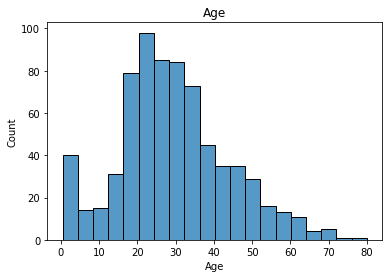

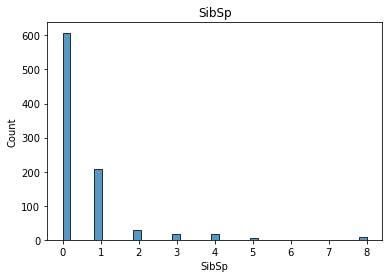

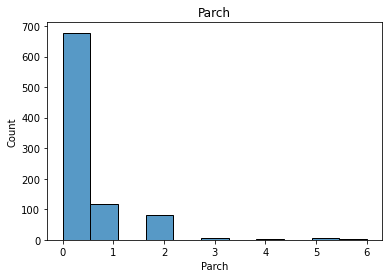

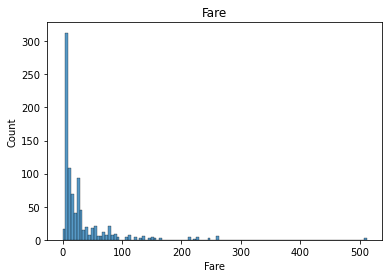

In [10]:
# create histograms for all numeric variabels

for column in df_numeric.columns:
    sns.histplot(df_numeric[column])
    plt.title(column)
    plt.show()

Note: we might want to normalize 'Fare' because it is so heavily skewed.

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

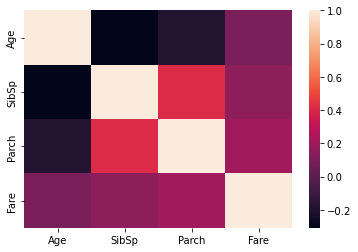

In [11]:
# examine the correlations of the numeric variables

print(df_numeric.corr())

sns.heatmap(df_numeric.corr())

In [12]:
# compare survival rate across Age, SibSp, Parch, and Fare using a pivot table

pd.pivot_table(df_train, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


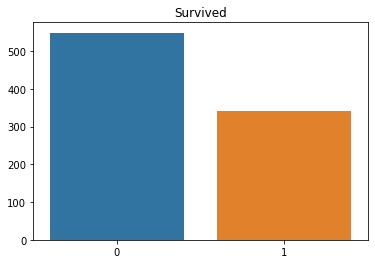

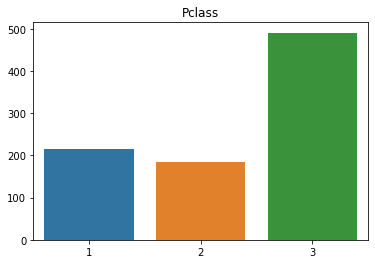

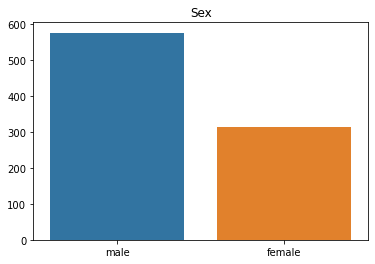

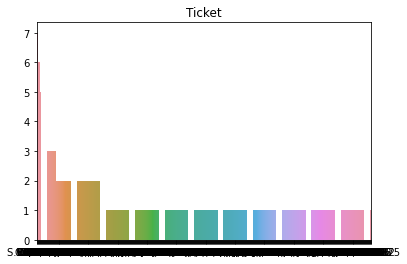

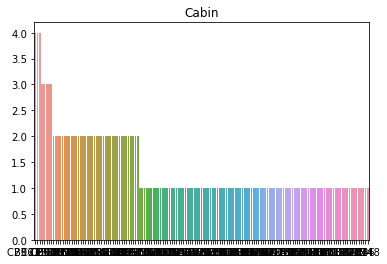

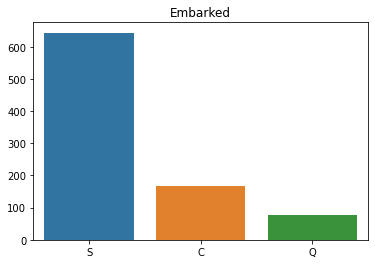

In [13]:
# create barcharts for the categorical variables

for column in df_categorical.columns:
    sns.barplot(x=df_train[column].value_counts().index, y=df_train[column].value_counts().values)
    plt.title(column)
    plt.show()

Cabin and Ticket graphs are messy. This would be a good opportunity to do some feature engineering.

In [14]:
# comparing survival and each of these categorical variables

print(pd.pivot_table(df_train, index='Survived', columns='Pclass', values='Ticket', aggfunc='count')) 
print()
print(pd.pivot_table(df_train, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(df_train, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


### Feature Engineering

1) Cabin - simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multi) impacted survival)

2) Ticket - Do different ticket types impact survival rates?

3) Does a person's title relate to survial rates?

In [15]:
# how many people had multiple cabins?

df_train['cabin_multiple'] = df_train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

df_train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [16]:
# Create a pivot table to compare survival by cabin_multiple

pd.pivot_table(df_train, index='Survived', columns='cabin_multiple', values='Ticket', aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [17]:
# Create a new feature called 'cabin_letter' that extracts the first letter of the cabin.
# 'n' stands for 'null' if the cabin is null

df_train['cabin_letter'] = df_train.Cabin.apply(lambda x: x[0] if pd.notna(x) else 'n')
df_train.cabin_letter.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_letter, dtype: int64

In [18]:
# create a pivot table to compare survival by cabin_letter

pd.pivot_table(df_train, index='Survived', columns='cabin_letter', values='Ticket', aggfunc='count')

cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [19]:
# we need to understand ticket number
# numeric vs non-numeric

df_train['ticket_numeric'] = df_train.Ticket.apply(lambda x: 1 if x.isdigit() else 0)
df_train['ticket_letters'] = df_train.Ticket.apply(lambda x: len(x) if x.isalpha() else 0)

In [20]:
df_train.ticket_numeric.value_counts()

1    661
0    230
Name: ticket_numeric, dtype: int64

In [21]:
df_train.ticket_letters.value_counts()

0    887
4      4
Name: ticket_letters, dtype: int64

In [22]:
# use a pivot table to compare survival by ticket_numeric

pd.pivot_table(df_train, index='Survived', columns='ticket_numeric', values='Ticket', aggfunc='count')

ticket_numeric,0,1
Survived,,
0,142,407
1,88,254


In [23]:
# create a new feature called 'name_title' that extracts the title from the name

df_train['name_title'] = df_train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_train.name_title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [24]:
# create a pivot table to compare survival by name_title

pd.pivot_table(df_train, index='Survived', columns='name_title', values='Ticket', aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


Grouping the titles together might be worthwhile.

## Data Preprocessing for Modeling

1) Drop null values from Embarked (2)

2) Include only relevant variables (since we have limited data, I wanted to exclude things like name and passenger ID so that we could have a reasonable number of features for our models to deal with)

3) Do categorical transforms on all data. Usually we would use a tranformer, but with this approach we can ensure that our training and testing data are in the same format. We may also be able to infer something about the shape of the test data through this method. I will stress, this is enerally nt recommended outside of a competition. (Use one hot encoding)

4) Impute data with mean for fare and age (could also experiment with median)

5) Normalize fare using algorithm to give a semblence of a normal distribution

6) Scaled data 0 - 1 using StandardScaler

In [25]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_multiple',
       'cabin_letter', 'ticket_numeric', 'ticket_letters', 'name_title'],
      dtype='object')

In [26]:
# Feature engineering on validation dataframe
df_test['cabin_multiple'] = df_test.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df_test['cabin_letter'] = df_test.Cabin.apply(lambda x: x[0] if pd.notna(x) else 'n')
df_test['ticket_numeric'] = df_test.Ticket.apply(lambda x: 1 if x.isdigit() else 0)
df_test['ticket_letters'] = df_test.Ticket.apply(lambda x: len(x) if x.isalpha() else 0)
df_test['name_title'] = df_test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_letter,ticket_numeric,ticket_letters,name_title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,n,1,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,n,1,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,n,1,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,n,1,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,n,1,0,Mrs


In [27]:
# impute missing values in the categorical features for both the training and validation dataframes
# use the median
# use the training data to impute the missing values in the validation dataframe to avoid overfitting

df_train.Age = df_train.Age.fillna(df_train.Age.median())
df_test.Age = df_test.Age.fillna(df_train.Age.median())

df_train.Fare = df_train.Fare.fillna(df_train.Fare.median())
df_test.Fare = df_test.Fare.fillna(df_train.Fare.median())

In [28]:
# drop records with null values in the 'embarked' column
df_train.dropna(subset=['Embarked'], inplace=True)
df_test.dropna(subset=['Embarked'], inplace=True)

In [29]:
# create the log norm of the fare column
# the +1 is to avoid log(0)
df_train['fare_norm'] = df_train.Fare.apply(lambda x: np.log(x+1))
df_test['fare_norm'] = df_test.Fare.apply(lambda x: np.log(x+1))

In [30]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_multiple',
       'cabin_letter', 'ticket_numeric', 'ticket_letters', 'name_title',
       'fare_norm'],
      dtype='object')

In [31]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_letter,ticket_numeric,ticket_letters,name_title,fare_norm
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,0,0,Mr,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,0,0,Mrs,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,0,0,Miss,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,1,0,Mrs,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,1,0,Mr,2.202765


In [32]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_letter,ticket_numeric,ticket_letters,name_title,fare_norm
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,n,1,0,Mr,2.178064
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,n,1,0,Mrs,2.079442
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,n,1,0,Mr,2.369075
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,n,1,0,Mr,2.268252
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,n,1,0,Mrs,2.586824


In [33]:
columns_for_training = [
    'Pclass',
    'Age',
    'SibSp',
    'Parch',
    'Sex',
    'Fare',
    'Embarked',
    'cabin_letter',
    'fare_norm',
    'name_title'
]

In [34]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df_train[columns_for_training], df_train['Survived'], test_size=0.2, random_state=42)

In [35]:
X_train.head()

,Pclass,Age,SibSp,Parch,Sex,Fare,Embarked,cabin_letter,fare_norm,name_title
708,1,22.0,0,0,female,151.5500,S,n,5.027492,Miss
240,3,28.0,1,0,female,14.4542,C,n,2.737881,Miss
382,3,32.0,0,0,male,7.9250,S,n,2.188856,Mr
792,3,28.0,8,2,female,69.5500,S,n,4.256322,Miss
683,3,14.0,5,2,male,46.9000,S,n,3.869116,Mr


In [36]:
X_valid.head()

,Pclass,Age,SibSp,Parch,Sex,Fare,Embarked,cabin_letter,fare_norm,name_title
281,3,28.0,0,0,male,7.8542,S,n,2.180892,Mr
435,1,14.0,1,2,female,120.0000,S,B,4.795791,Miss
39,3,14.0,1,0,female,11.2417,C,n,2.504848,Miss
418,2,30.0,0,0,male,13.0000,S,n,2.639057,Mr
585,1,18.0,0,2,female,79.6500,S,E,4.390119,Miss


In [37]:
y_train.head()

708    1
240    0
382    0
792    0
683    0
Name: Survived, dtype: int64

In [38]:
y_valid.head()

281    0
435    1
39     1
418    0
585    1
Name: Survived, dtype: int64

In [39]:
categorical_columns = [
    'Pclass',
    'Sex',
    'cabin_letter',
    'Embarked',
    'name_title',
    'SibSp',
    'Parch'
]

In [40]:
numeric_columns = [
    'Age',
    'Fare',
    'fare_norm'
]

In [41]:
# use a one_hot_encoder to encode categorical variables in X_train and X_valid

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_one_hot = pd.DataFrame(one_hot_encoder.fit_transform(X_train[categorical_columns]))
X_valid_one_hot = pd.DataFrame(one_hot_encoder.transform(X_valid[categorical_columns]))

X_train_one_hot.index = X_train.index
X_valid_one_hot.index = X_valid.index

X_train_one_hot.columns = one_hot_encoder.get_feature_names_out(categorical_columns)
X_valid_one_hot.columns = one_hot_encoder.get_feature_names_out(categorical_columns)

X_train_numeric = X_train.drop(columns=categorical_columns, axis=1)
X_valid_numeric = X_valid.drop(columns=categorical_columns, axis=1)

X_train_encoded = pd.concat([X_train_numeric, X_train_one_hot], axis=1)
X_valid_encoded = pd.concat([X_valid_numeric, X_valid_one_hot], axis=1)

In [42]:
X_train_encoded.head()

,Age,Fare,fare_norm,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,cabin_letter_A,cabin_letter_B,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
708,22.0,151.5500,5.027492,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
240,28.0,14.4542,2.737881,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
382,32.0,7.9250,2.188856,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
792,28.0,69.5500,4.256322,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
683,14.0,46.9000,3.869116,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [43]:
X_valid_encoded.head()

,Age,Fare,fare_norm,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,cabin_letter_A,cabin_letter_B,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
281,28.0,7.8542,2.180892,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
435,14.0,120.0000,4.795791,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39,14.0,11.2417,2.504848,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
418,30.0,13.0000,2.639057,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
585,18.0,79.6500,4.390119,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
# use a StandardScaler to scale the numeric variables in X_train and X_valid

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_encoded[numeric_columns]))
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid_encoded[numeric_columns]))

X_train_scaled.index = X_train_encoded.index
X_valid_scaled.index = X_valid_encoded.index

X_train_scaled.columns = numeric_columns
X_valid_scaled.columns = numeric_columns

X_train_cat = X_train_encoded.drop(columns=numeric_columns, axis=1)
X_valid_cat = X_valid_encoded.drop(columns=numeric_columns, axis=1)

X_train_final = pd.concat([X_train_scaled, X_train_cat], axis=1)
X_valid_final = pd.concat([X_valid_scaled, X_valid_cat], axis=1)


In [45]:
X_train_final.head()

,Age,Fare,fare_norm,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,cabin_letter_A,cabin_letter_B,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
708,-0.571868,2.430597,2.118191,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
240,-0.115088,-0.358135,-0.220452,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
382,0.189432,-0.490949,-0.781233,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
792,-0.115088,0.762595,1.330506,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
683,-1.180908,0.301860,0.935008,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [46]:
X_valid_final.head()

,Age,Fare,fare_norm,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,cabin_letter_A,cabin_letter_B,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
281,-0.115088,-0.492389,-0.789368,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
435,-1.180908,1.788823,1.881528,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39,-1.180908,-0.423482,-0.458475,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
418,0.037172,-0.387716,-0.321392,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
585,-0.876388,0.968044,1.467169,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Building Models (Establish Baseline Performance)
Before going further, I like to see how various different models perform with default parameters. I tried the following models using 5 fold cross validation to get a baseline. With a validation set basline, we can see how much tuning improves each of the models. Just because a model has a high basline on this validation set doesn't mean that it will actually do better on the eventual test set.

* Naive Bayes (72.6%)
* Logistic Regression (82.1%)
* Decision Tree (77.6%)
* K Nearest Neighbor (80.5%)
* Random Forest (80.6%)
* Support Vector Classifier (83.2%)
* Xtreme Gradient Boosting (81.8%)
* Soft Voting Classifier - All Models (82.8%)

In [47]:
# import ML libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [48]:
# use Naive Bayes as a baseline model for classification tasks
model_gnb = GaussianNB()
cross_validation_scores = cross_val_score(model_gnb, X_train_final, y_train, cv=5)

print("Cross-validation scores for the Naive Bayes model: {}".format(cross_validation_scores))
print("Mean cross-validation score for the Naive Bayes model: {:.2f}".format(cross_validation_scores.mean()))

Cross-validation scores for the Naive Bayes model: [0.43356643 0.42957746 0.43661972 0.44366197 0.42253521]
Mean cross-validation score for the Naive Bayes model: 0.43


In [49]:
# logistic regression model
model_lr = LogisticRegression(max_iter=2000)
cross_validation_scores = cross_val_score(model_lr, X_train_final, y_train, cv=5)

print("Cross-validation scores for the Logistic Regression model: {}".format(cross_validation_scores))
print("Mean cross-validation score for the Logistic Regression model: {:.2f}".format(cross_validation_scores.mean()))


Cross-validation scores for the Logistic Regression model: [0.83216783 0.83802817 0.85211268 0.85211268 0.77464789]
Mean cross-validation score for the Logistic Regression model: 0.83


In [50]:
# decision tree model
model_dt = tree.DecisionTreeClassifier()
cross_validation_scores = cross_val_score(model_dt, X_train_final, y_train, cv=5)

print("Cross-validation scores for the Decision Tree model: {}".format(cross_validation_scores))
print("Mean cross-validation score for the Decision Tree model: {:.2f}".format(cross_validation_scores.mean()))


Cross-validation scores for the Decision Tree model: [0.8041958  0.81690141 0.8028169  0.8028169  0.80985915]
Mean cross-validation score for the Decision Tree model: 0.81


In [51]:
# k nearest neighbors model
model_knn = KNeighborsClassifier(n_neighbors=5)
cross_validation_scores = cross_val_score(model_knn, X_train_final, y_train, cv=5)

print("Cross-validation scores for the KNN model: {}".format(cross_validation_scores))
print("Mean cross-validation score for the KNN model: {:.2f}".format(cross_validation_scores.mean()))

Cross-validation scores for the KNN model: [0.82517483 0.84507042 0.80985915 0.84507042 0.8028169 ]
Mean cross-validation score for the KNN model: 0.83


In [52]:
# random forest model - 100 trees
model_rf_100 = RandomForestClassifier(n_estimators=100)
cross_validation_scores = cross_val_score(model_rf_100, X_train_final, y_train, cv=5)

print("Cross-validation scores for the Random Forest (100) model: {}".format(cross_validation_scores))
print("Mean cross-validation score for the Random Forest (100) model: {:.2f}".format(cross_validation_scores.mean()))


Cross-validation scores for the Random Forest (100) model: [0.83216783 0.84507042 0.85915493 0.81690141 0.78873239]
Mean cross-validation score for the Random Forest (100) model: 0.83


In [53]:
# random forest model - 1000 trees
model_rf_1000 = RandomForestClassifier(n_estimators=1000)
cross_validation_scores = cross_val_score(model_rf_1000, X_train_final, y_train, cv=5)

print("Cross-validation scores for the Random Forest (1000) model: {}".format(cross_validation_scores))
print("Mean cross-validation score for the Random Forest (1000) model: {:.2f}".format(cross_validation_scores.mean()))

Cross-validation scores for the Random Forest (1000) model: [0.83216783 0.84507042 0.85211268 0.83098592 0.80985915]
Mean cross-validation score for the Random Forest (1000) model: 0.83


In [54]:
# support vector classifier
model_svc = SVC(probability=True)
cross_validation_scores = cross_val_score(model_svc, X_train_final, y_train, cv=5)

print("Cross-validation scores for the SVC model: {}".format(cross_validation_scores))
print("Mean cross-validation score for the SVC model: {:.2f}".format(cross_validation_scores.mean()))


Cross-validation scores for the SVC model: [0.82517483 0.84507042 0.83802817 0.83802817 0.78873239]
Mean cross-validation score for the SVC model: 0.83


In [55]:
# xgboost model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
cross_validation_scores = cross_val_score(model_xgb, X_train_final, y_train, cv=5)

print("Cross-validation scores for the XGB model: {}".format(cross_validation_scores))
print("Mean cross-validation score for the XGB model: {:.2f}".format(cross_validation_scores.mean()))


c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Cross-validation scores for the XGB model: [0.77622378 0.86619718 0.83098592 0.82394366 0.82394366]
Mean cross-validation score for the XGB model: 0.82


c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [56]:
# use a voting classifier to combine the above models
model_voting = VotingClassifier(
    estimators=[('gnb', model_gnb),
                ('lr', model_lr),
                ('dt', model_dt),
                ('knn', model_knn),
                ('rf_100', model_rf_100),
                ('rf_1000', model_rf_1000),
                ('svc', model_svc),
                ('xgb', model_xgb)],
    voting='soft')

cross_validation_scores = cross_val_score(model_voting, X_train_final, y_train, cv=5)

print("Cross-validation scores for the Voting Classifier model: {}".format(cross_validation_scores))
print("Mean cross-validation score for the Voting Classifier model: {:.2f}".format(cross_validation_scores.mean()))

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

Cross-validation scores for the Voting Classifier model: [0.83916084 0.83098592 0.83802817 0.82394366 0.82394366]
Mean cross-validation score for the Voting Classifier model: 0.83


c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


### Model Tuning
After getting the baselines, let's see if we can improve on the indivdual model results!I mainly used grid search to tune the models. I also used Randomized Search for the Random Forest and XG boosted model to simplify testing time.

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [58]:
# simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))



In [59]:
# logistic regression model
model_lr = LogisticRegression()

param_grid = {
    'max_iter': [1000, 2000, 3000, 4000, 5000],
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

clf_lr = GridSearchCV(model_lr, param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_lr = clf_lr.fit(X_train_final, y_train)
clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Logistic Regression
Best Score: 0.8255983453166552
Best Parameters: {'C': 0.615848211066026, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


In [60]:
# k nearest neighbors model
model_knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': np.arange(1, 20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

clf_knn = GridSearchCV(model_knn, param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_knn = clf_knn.fit(X_train_final, y_train)
clf_performance(best_clf_knn, 'KNN')


Fitting 5 folds for each of 114 candidates, totalling 570 fits
KNN
Best Score: 0.8312124495223087
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}


In [70]:
# svc model
model_svc = SVC()

param_grid = tuned_parameters = [
    {
        'kernel': ['rbf'],
        'gamma': [0.1, 0.5, 1, 2, 5, 10],
        'C': [0.1, 1, 10, 100, 1000],
        'probability': [True]
    },
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10, 100, 1000],
        'probability': [True]
    },
    {
        'kernel': ['poly'],
        'degree': [2, 3, 4, 5],
        'C': [0.1, 1, 10, 100, 1000],
        'probability': [True]
    }
]

clf_svc = GridSearchCV(model_svc, param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_svc = clf_svc.fit(X_train_final, y_train)
clf_performance(best_clf_svc, 'SVC')


Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8396533044420369
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}


In [62]:
# random forest model
model_rf = RandomForestClassifier()

param_grid = {
    'n_estimators': np.arange(100, 1000, 100),
    'bootstrap': [True, False],
    'max_depth': np.arange(1, 100, 25),
    'min_samples_leaf': np.arange(1, 10, 2),
    'min_samples_split': np.arange(2, 10, 2)
}

clf_rf = GridSearchCV(model_rf, param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_rf = clf_rf.fit(X_train_final, y_train)
clf_performance(best_clf_rf, 'Random Forest')



Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Random Forest
Best Score: 0.8551364128828919
Best Parameters: {'bootstrap': True, 'max_depth': 26, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 800}


In [72]:
# xgboost model
model_xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

param_grid = {
    'n_estimators': np.arange(250, 750, 250),
    'colsample_bytree': np.arange(0.60, 0.9, 0.1),
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': np.arange(0.5, 0.7, 0.1),
    'learning_rate': [0.5],
    'gamma': [0.5, 1, 2],
    'min_child_weight': [0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(model_xgb, param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_xgb = clf_xgb.fit(X_train_final, y_train)
clf_performance(best_clf_xgb, 'XGB')

Fitting 5 folds for each of 144 candidates, totalling 720 fits
XGB
Best Score: 0.848123707278637
Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 250, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.6}


c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


### Model Ensemble Approaches

In [73]:
# get the best model from each model type
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

best_models = [
    ('lr', best_lr),
    ('knn', best_knn),
    ('svc', best_svc),
    ('rf', best_rf),
    ('xgb', best_xgb)
]

In [74]:
soft_voting_ensemble = VotingClassifier(
    estimators=best_models,
    voting='soft'
)

hard_voting_ensemble = VotingClassifier(
    estimators=best_models,
    voting='hard'
)


In [75]:
# cross validation scores for the soft voting ensemble
cross_validation_scores = cross_val_score(soft_voting_ensemble, X_train_final, y_train, cv=5)

print("Cross-validation scores for the soft Voting Classifier model: {}".format(cross_validation_scores))
print("Mean cross-validation score for the soft Voting Classifier model: {:.2f}".format(cross_validation_scores.mean()))

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

Cross-validation scores for the soft Voting Classifier model: [0.87412587 0.85915493 0.84507042 0.85211268 0.81690141]
Mean cross-validation score for the soft Voting Classifier model: 0.85


In [76]:
# cross validation scores for the hard voting ensemble
cross_validation_scores = cross_val_score(hard_voting_ensemble, X_train_final, y_train, cv=5)

print("Cross-validation scores for the hard Voting Classifier model: {}".format(cross_validation_scores))
print("Mean cross-validation score for the hard Voting Classifier model: {:.2f}".format(cross_validation_scores.mean()))

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

Cross-validation scores for the hard Voting Classifier model: [0.86713287 0.85915493 0.85211268 0.85915493 0.81690141]
Mean cross-validation score for the hard Voting Classifier model: 0.85


In [77]:
# in a soft voting classifier you can weight some models more than others. I used a grid search to explore different weightings

params = {
    'weights': [
        np.random.rand(5),
        np.random.rand(5),
        np.random.rand(5),
        np.random.rand(5),
        np.random.rand(5),
    ]
}

vote_weight = GridSearchCV(soft_voting_ensemble, params, cv=5, verbose=True, n_jobs=-1)
best_clf_weight = vote_weight.fit(X_train_final, y_train)
clf_performance(best_clf_weight, 'Soft Voting Classifier')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Soft Voting Classifier
Best Score: 0.8522801142519452
Best Parameters: {'weights': array([0.91317487, 0.33696348, 0.9375815 , 0.24315968, 0.70805483])}


c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [78]:
# get a prediction for the test set from the soft voting ensemble with the best weightings
soft_voting_predictions = best_clf_weight.predict(X_valid_final)


In [79]:
# score the soft voting ensemble on the validation set
soft_voting_score = best_clf_weight.score(X_valid_final, y_valid)
print("Soft Voting Classifier score on the validation set: {:.2f}".format(soft_voting_score))


Soft Voting Classifier score on the validation set: 0.79


In [83]:
# create a confusion matrix for the soft voting ensemble
from sklearn.metrics import confusion_matrix

soft_voting_confusion_matrix = confusion_matrix(y_valid, soft_voting_predictions)
print("Confusion matrix for the soft Voting Classifier model: \n{}".format(soft_voting_confusion_matrix))

Confusion matrix for the soft Voting Classifier model: 
[[91 18]
 [19 50]]


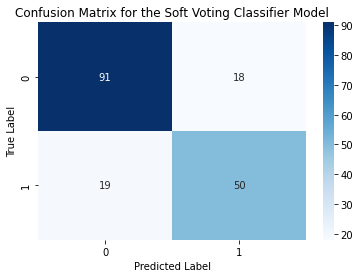

In [84]:
# visualize the confusion matrix for the soft voting ensemble
import seaborn as sns
import matplotlib.pyplot as plt

# plot the confusion matrix
sns.heatmap(soft_voting_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for the Soft Voting Classifier Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [89]:
# calculate performance metrics for the soft voting ensemble
from sklearn.metrics import accuracy_score, precision_score, recall_score

soft_voting_accuracy = accuracy_score(y_valid, soft_voting_predictions)
print("Accuracy for the soft Voting Classifier model: {:.2f}".format(soft_voting_accuracy))

soft_voting_precision = precision_score(y_valid, soft_voting_predictions)
print("Precision for the soft Voting Classifier model: {:.2f}".format(soft_voting_precision))

soft_voting_recall = recall_score(y_valid, soft_voting_predictions)
print("Recall for the soft Voting Classifier model: {:.2f}".format(soft_voting_recall))


Accuracy for the soft Voting Classifier model: 0.79
Precision for the soft Voting Classifier model: 0.74
Recall for the soft Voting Classifier model: 0.72


In [85]:
# get a prediction for the validation set from the hard voting ensemble with the best weightings
hard_voting_predictions = best_clf_weight.predict(X_valid_final)


In [86]:
# score the hard voting ensemble on the validation set
hard_voting_score = best_clf_weight.score(X_valid_final, y_valid)
print("Hard Voting Classifier score on the validation set: {:.2f}".format(hard_voting_score))


Hard Voting Classifier score on the validation set: 0.79


In [87]:
# create a confusion matrix for the hard voting ensemble
hard_voting_confusion_matrix = confusion_matrix(y_valid, hard_voting_predictions)
print("Confusion matrix for the hard Voting Classifier model: \n{}".format(hard_voting_confusion_matrix))

Confusion matrix for the hard Voting Classifier model: 
[[91 18]
 [19 50]]


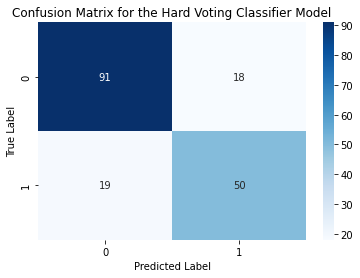

In [88]:
# plot the confusion matrix
sns.heatmap(hard_voting_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for the Hard Voting Classifier Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [90]:
# calculate performance metrics for the hard voting ensemble

hard_voting_accuracy = accuracy_score(y_valid, hard_voting_predictions)
print("Accuracy for the hard Voting Classifier model: {:.2f}".format(hard_voting_accuracy))

hard_voting_precision = precision_score(y_valid, hard_voting_predictions)
print("Precision for the hard Voting Classifier model: {:.2f}".format(hard_voting_precision))

hard_voting_recall = recall_score(y_valid, hard_voting_predictions)
print("Recall for the hard Voting Classifier model: {:.2f}".format(hard_voting_recall))


Accuracy for the hard Voting Classifier model: 0.79
Precision for the hard Voting Classifier model: 0.74
Recall for the hard Voting Classifier model: 0.72
